# Concentration, Temperature and the Nernst Equation

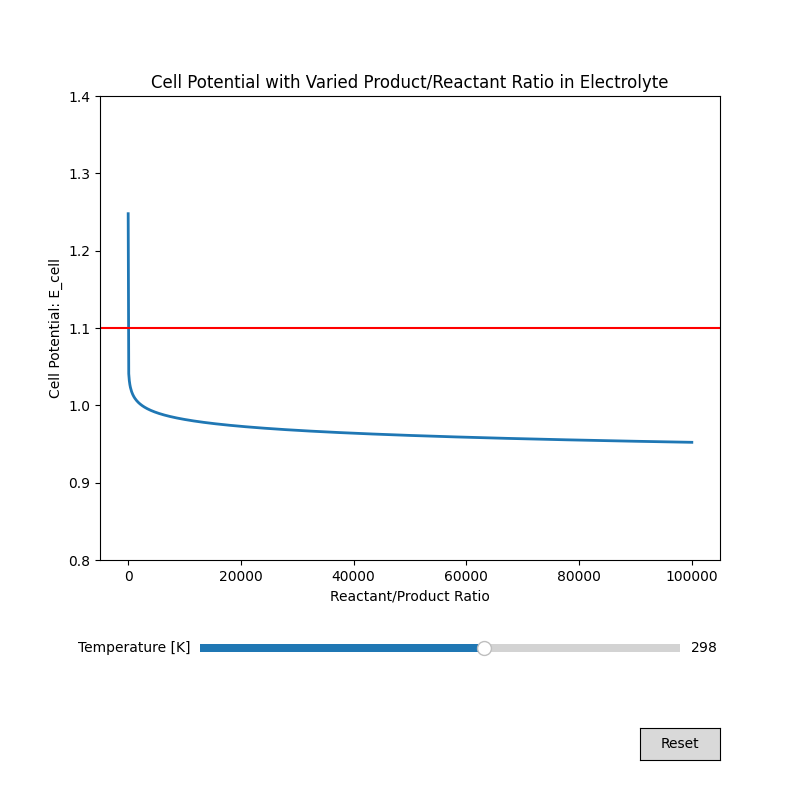

In [20]:
# Change in cell potential with concentration and temperature in reaction

%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
import matplotlib.transforms as transforms


def cell_potential(Ecell0, temperature, electrons, product_reactant_ratio):
    R = 8.314  # J/mol/K
    F = 96485  # C/mol
    Ecell = Ecell0 - (((R*temperature)/(electrons*F))*np.log(product_reactant_ratio))
    return Ecell


varied_ratio = np.linspace(1e-5, 1e5, 1000)

# Define initial parameters
init_temperature = 298  # K

# Create the figure and the line that we will manipulate
Ecell_Cathode = 0.76 # V - Cu: Daniell Cell
Ecell_Anode = - 0.34 # V - Zn: Daniell Cell
Ecell = Ecell_Cathode - Ecell_Anode 
electrons = 2 # : Daniell Cell
fig, ax = plt.subplots(figsize=(8, 8))
line, = plt.plot(varied_ratio, cell_potential(Ecell, init_temperature, electrons, varied_ratio), lw=2)
plt.title("Cell Potential with Varied Product/Reactant Ratio in Electrolyte")
plt.xlabel('Reactant/Product Ratio')
plt.ylabel('Cell Potential: E_cell')

plt.axhline(y=Ecell, color='r', linestyle='-')
trans = transforms.blended_transform_factory(
    ax.get_yticklabels()[0].get_transform(), ax.transData)
plt.ylim(Ecell-0.3, Ecell+0.3)

# Adjust the main plot to make room for the sliders
plt.subplots_adjust(bottom=0.3)

# Make sliders to control the temperature and number of moles.
axtemp = plt.axes([0.25, 0.18, 0.6, 0.02])
temp_slider = Slider(
    ax=axtemp,
    label='Temperature [K]',
    valmin=150,
    valmax=400,
    valinit=init_temperature,
)

# The function to be called anytime a slider's value changes
def update(val):
    line.set_ydata(cell_potential(Ecell, temp_slider.val, electrons, varied_ratio))
    fig.canvas.draw_idle()


# Register the update function with each slider
temp_slider.on_changed(update)

# Create a 'matplotlib.widgets.Button' to reset the sliders to initial values.
resetax = plt.axes([0.8, 0.05, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')


def reset(event):
    temp_slider.reset()


button.on_clicked(reset)

plt.show()